In [22]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import polars as pl
from polars import col as c

# Import the project's modules
from figure_manager import FigureManager
from figure_manager import generate_plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Set notebook parameters

In [23]:
PROJECT_ROOT = "../"
EXTERNAL_DATA_PATH: str = "data/"
FIGURES_PATH: str = "outputs/figures"
PAPER_SIZE: str = "A4"
FILE_EXT: str = ".pdf"
USE_LATEX: bool = False
VERBOSE: bool = False

Load data

In [24]:
# load data
data = pl.read_csv(f"{PROJECT_ROOT}{EXTERNAL_DATA_PATH}Males.csv")

<Axes: title={'center': 'Average Wage by Experience and Residence'}, xlabel='Experience', ylabel='Wage'>

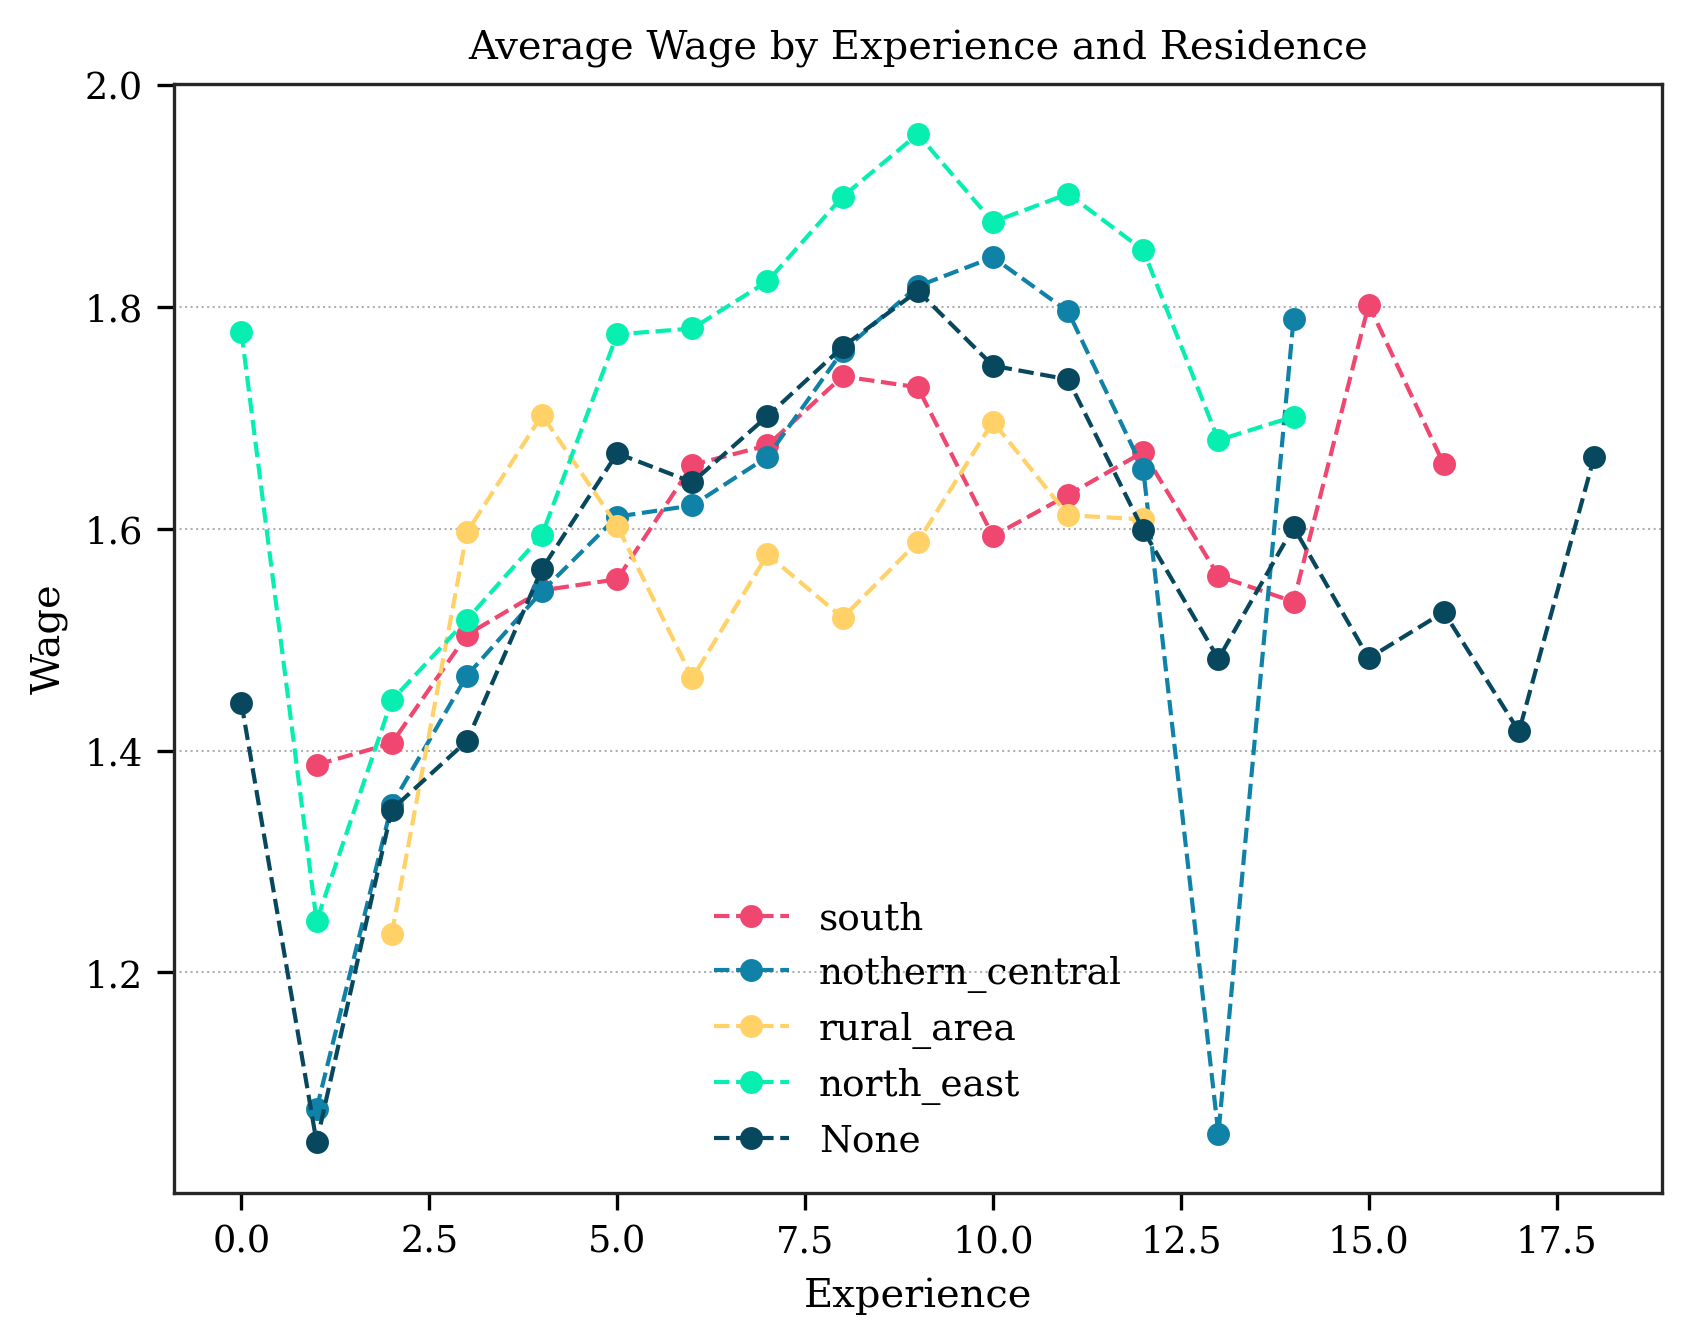

In [25]:
generate_plot(
    data,
    x="exper",
    y="wage",
    plot_type="plot",
    group_by="residence",
    agg_fct=pl.mean,
    xlabel="Experience",
    ylabel="Wage",
    title="Average Wage by Experience and Residence",
    plot_settings={"marker": "o", "linestyle": "--"},
    verbose=VERBOSE,
    sort_order=["south", "nothern_central", "rural_area", "north_east"],
)

Saved full figure to outputs/figures/one_big_plot.pdf
Saved subplot to outputs/figures/one_big_plot_subplot_1.pdf


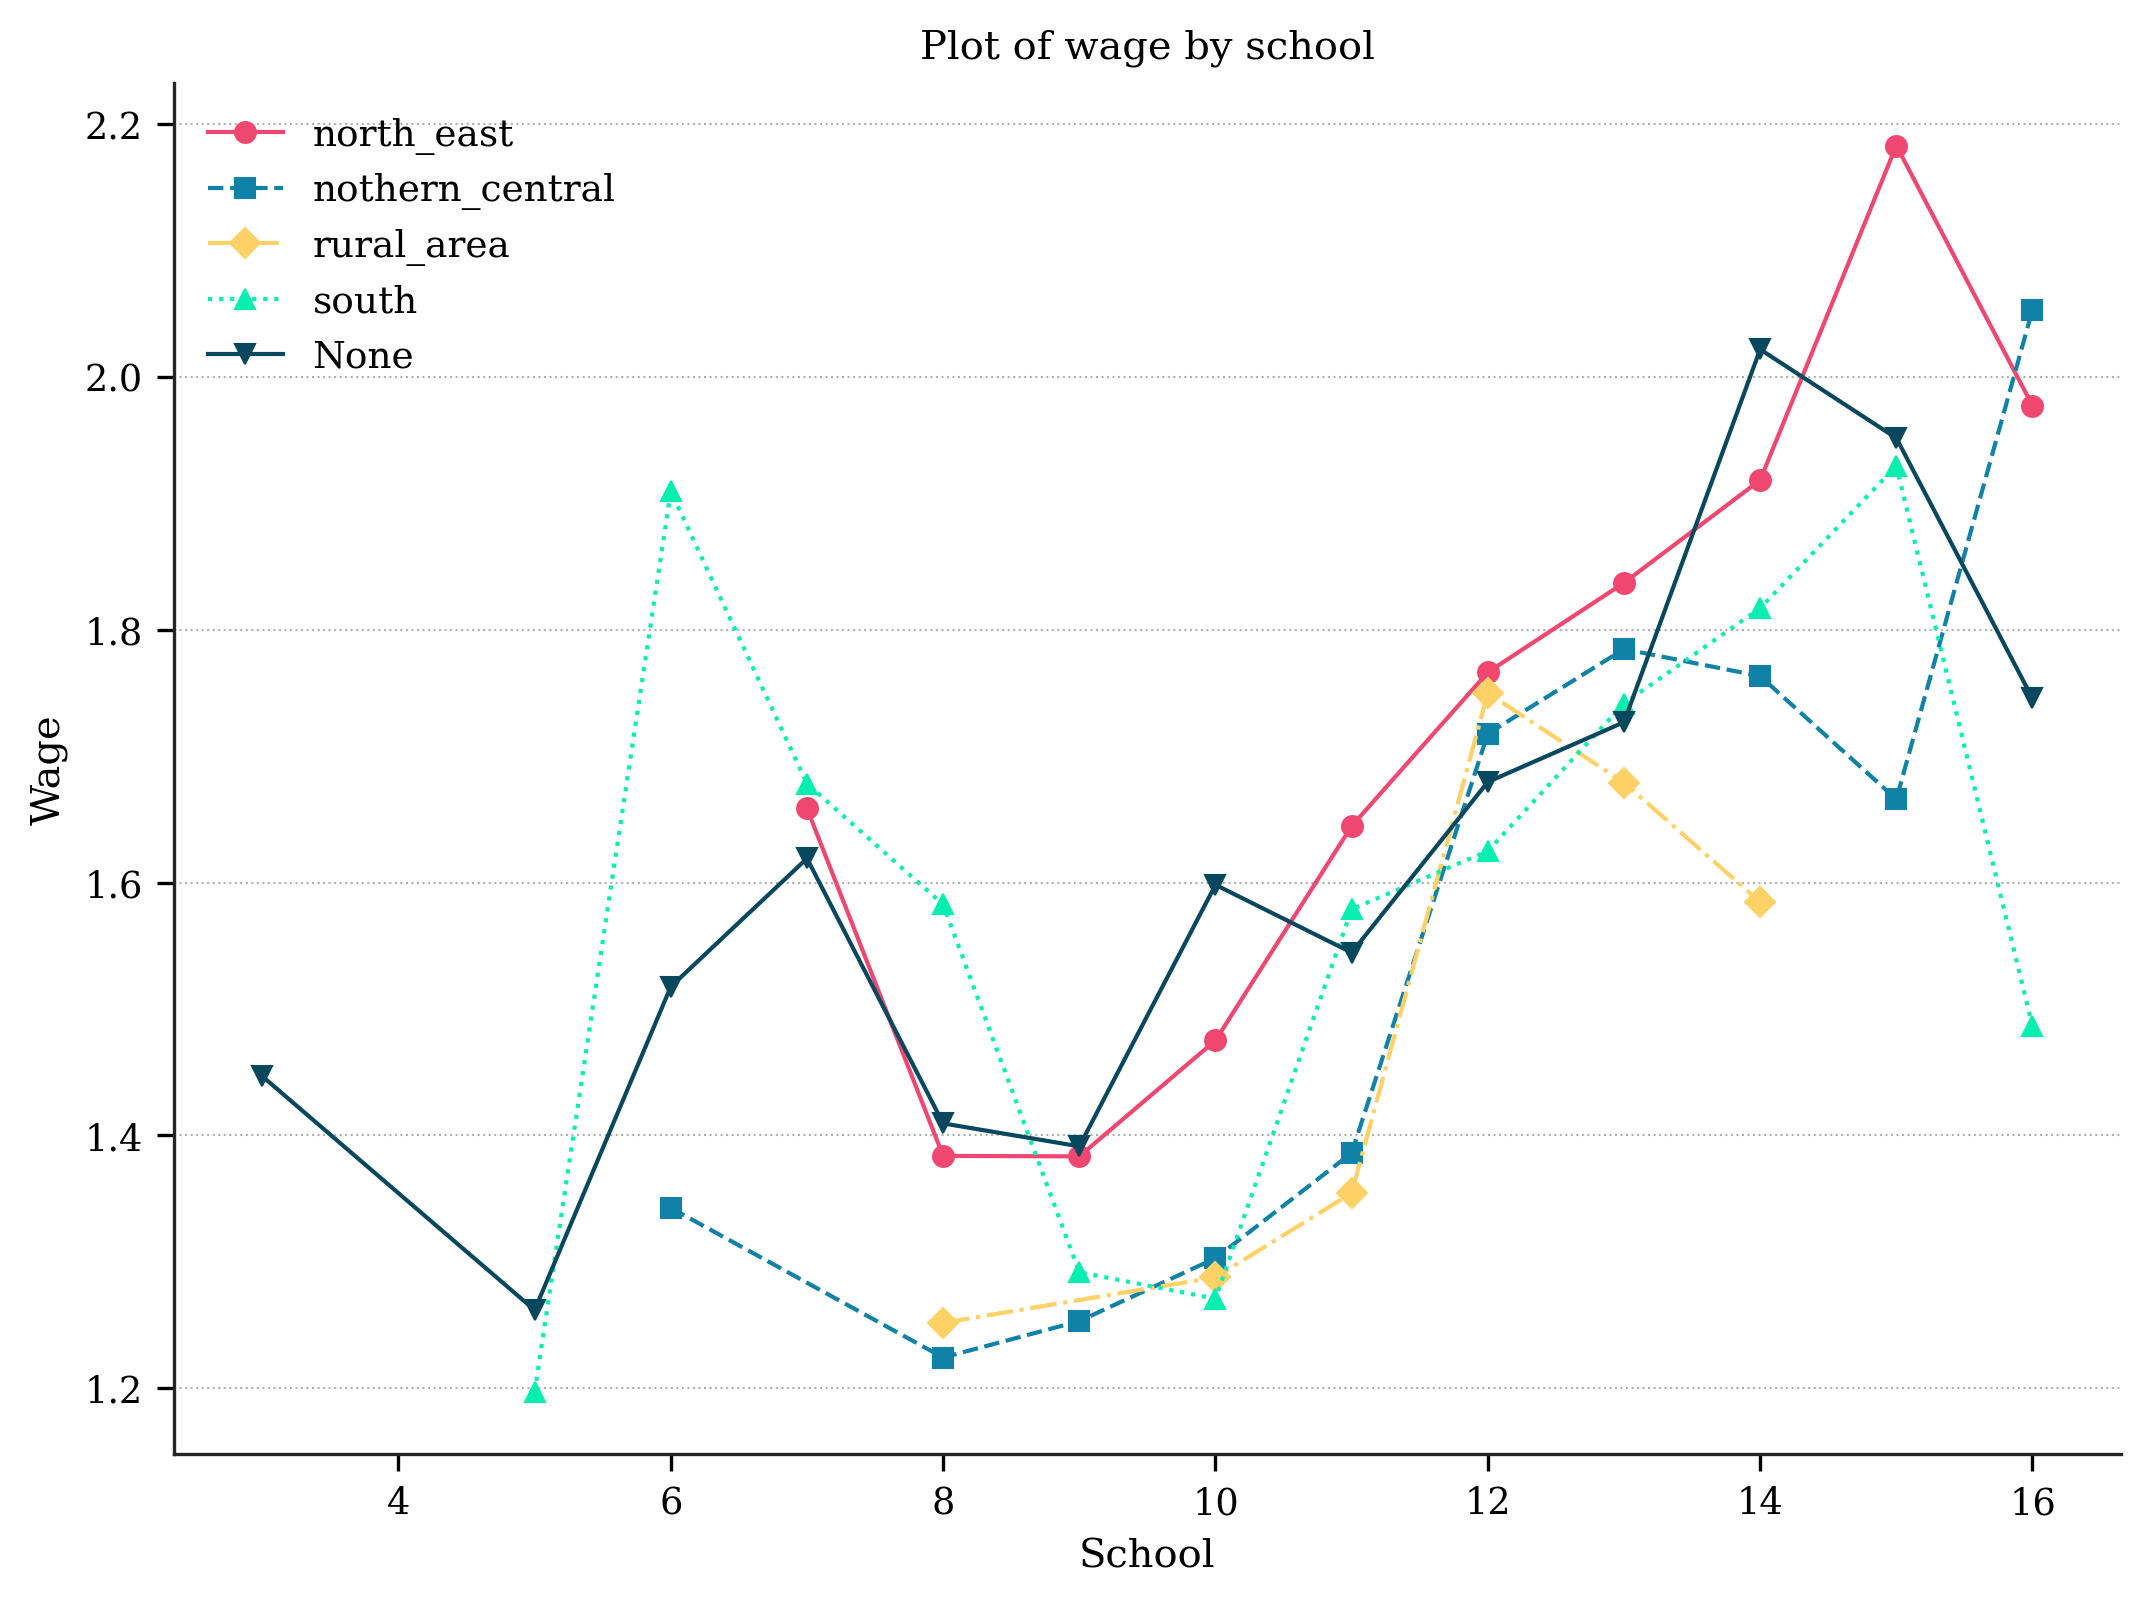

In [26]:
# Set up the FigureManager
fm = FigureManager(
    output_dir=f"{FIGURES_PATH}",
    paper_size=PAPER_SIZE,
    file_ext=FILE_EXT,
    use_latex=USE_LATEX,
)

# Create figure and subplot managers with specified layout
fig, axes = fm.create_figure(n_rows=1, n_cols=1, n_subplots=1)

axes[0] = generate_plot(
    data,
    x="school",
    y="wage",
    plot_type="plot",
    group_by="residence",
    agg_fct=pl.mean,
    ax=axes[0],
    verbose=False,
    # title='Average Wage by School and Residence'
)

fm.save_figure(filename="one_big_plot")

Saved full figure to outputs/figures/three_small_plots.pdf
Saved subplot to outputs/figures/three_small_plots_subplot_1.pdf
Saved subplot to outputs/figures/three_small_plots_subplot_2.pdf
Saved subplot to outputs/figures/three_small_plots_subplot_3.pdf


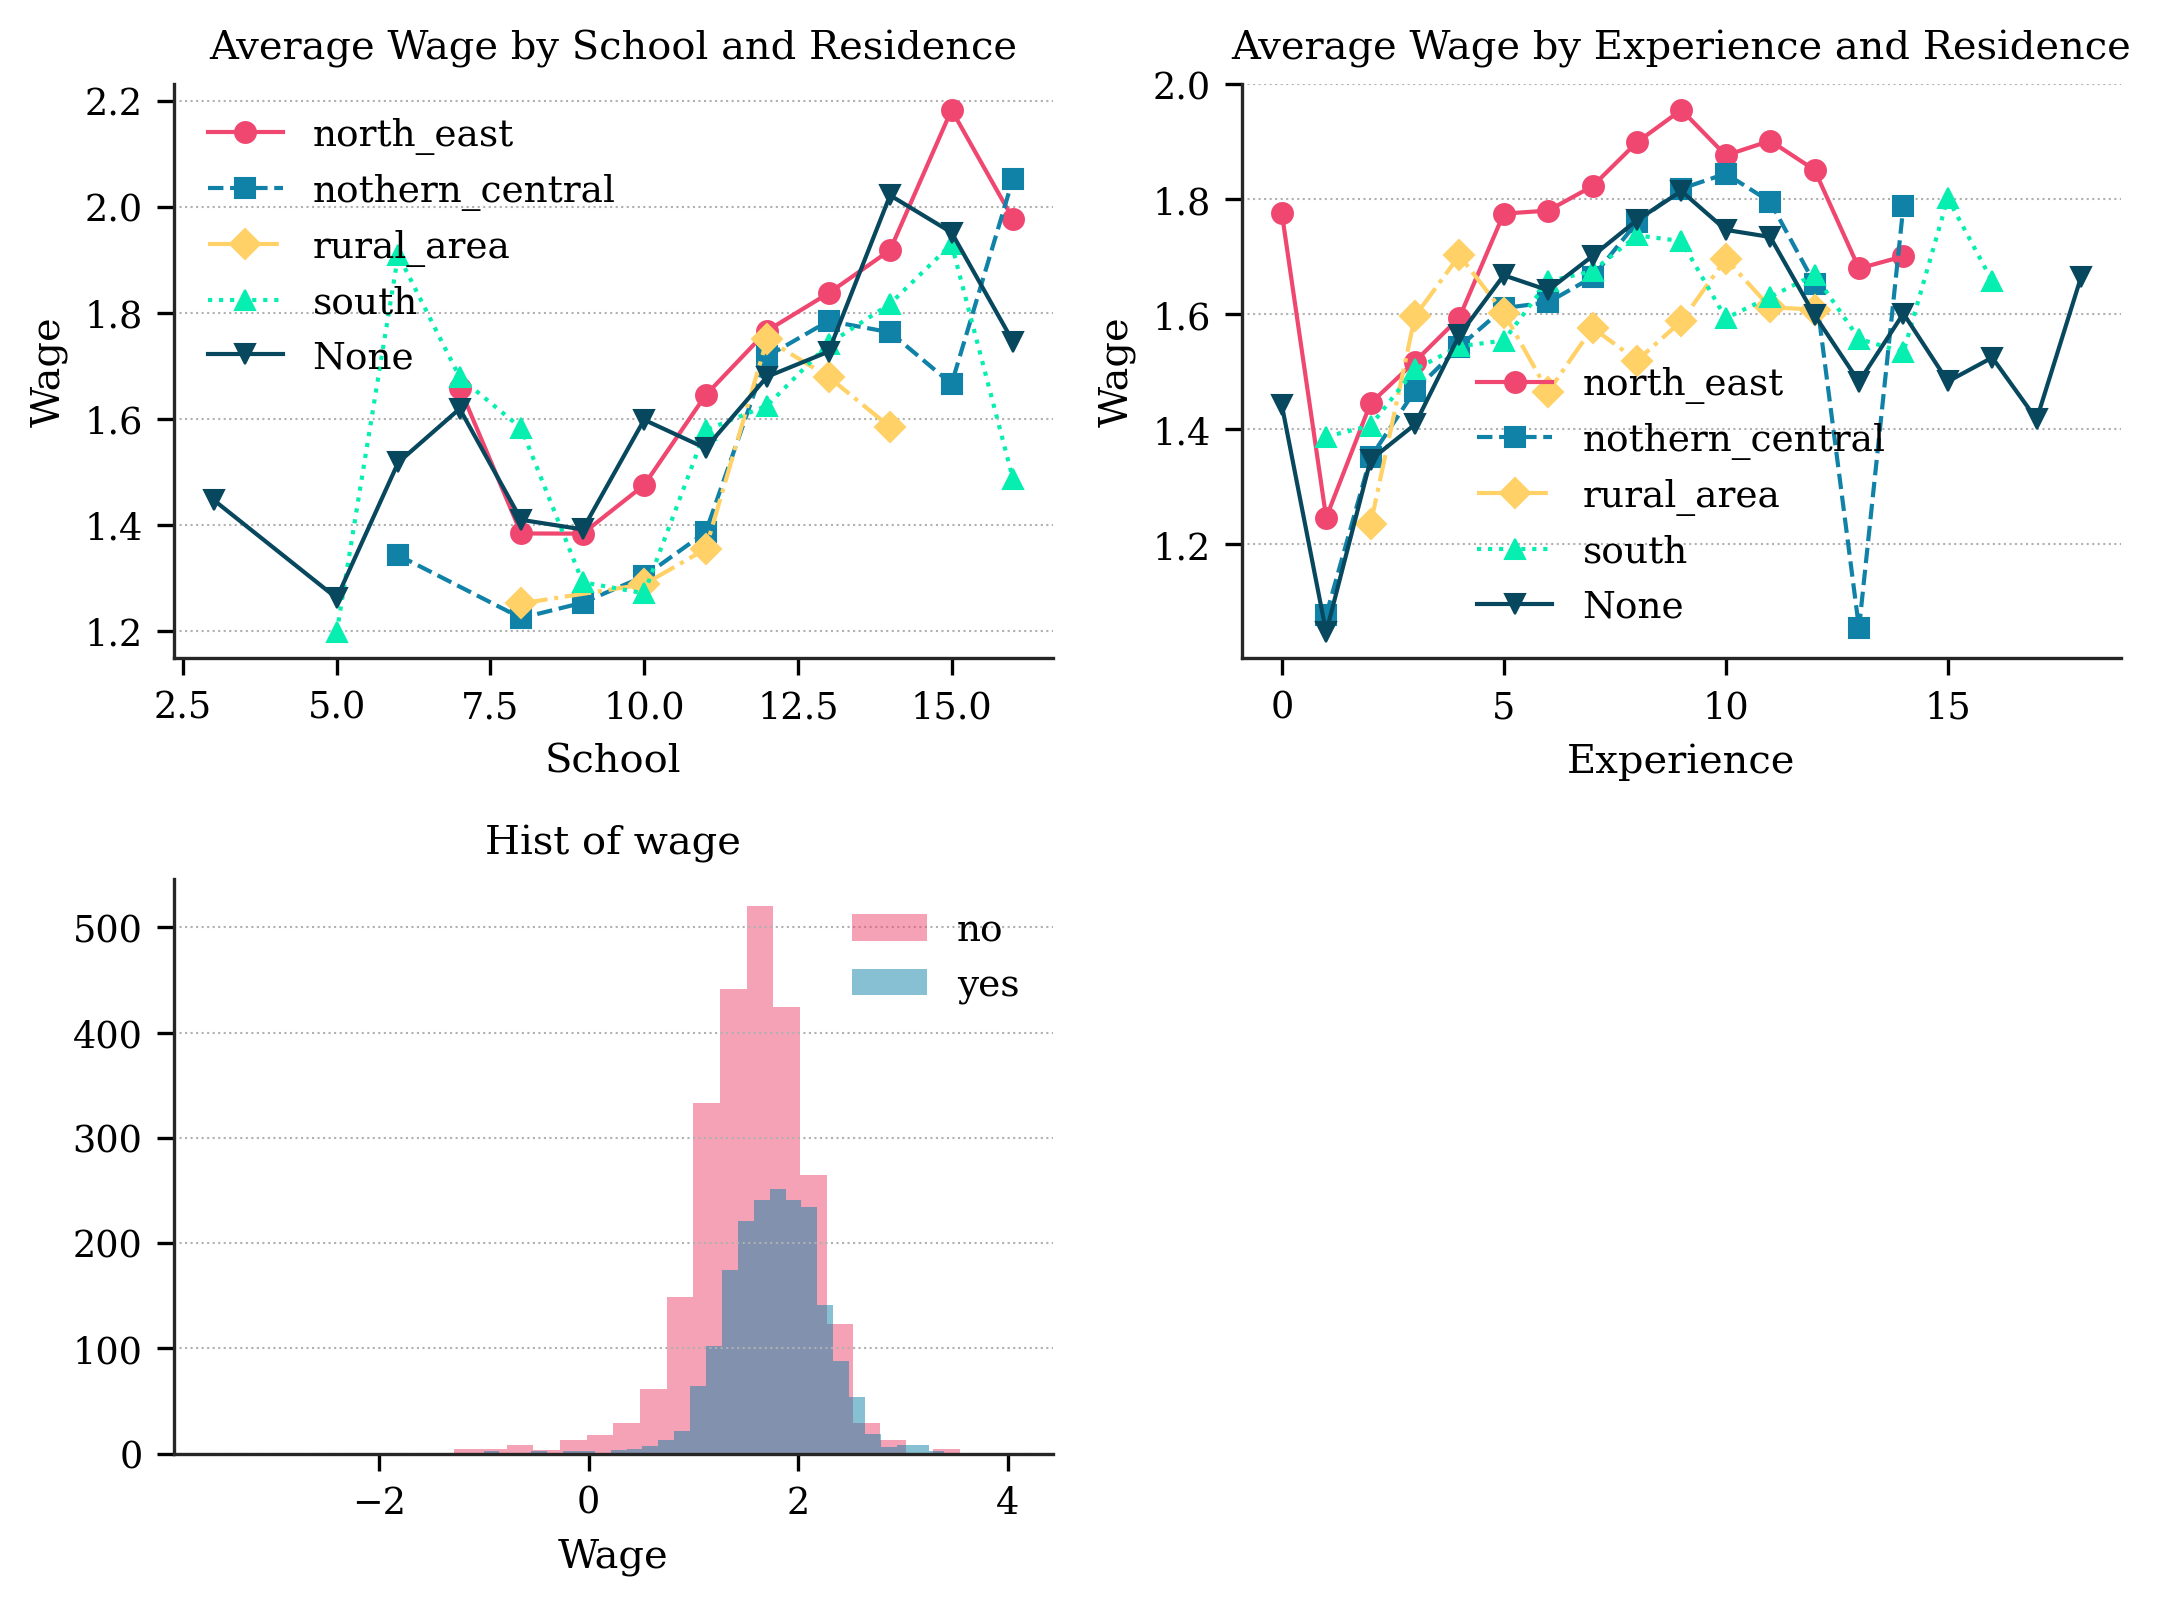

In [27]:
# Set up the FigureManager
fm = FigureManager(
    output_dir=f"{FIGURES_PATH}",
    paper_size=PAPER_SIZE,
    file_ext=FILE_EXT,
    use_latex=USE_LATEX,
)

# Create figure and subplot managers with specified layout
fig, axes = fm.create_figure(n_rows=2, n_cols=2, n_subplots=3)

axes[0] = generate_plot(
    data,
    x="school",
    y="wage",
    plot_type="plot",
    x_bins=5,
    group_by="residence",
    agg_fct=pl.mean,
    ax=axes[0],
    verbose=VERBOSE,
    xlabel="School",
    ylabel="Wage",
    title="Average Wage by School and Residence",
)
axes[1] = generate_plot(
    data,
    x="exper",
    y="wage",
    plot_type="plot",
    x_bins=5,
    group_by="residence",
    agg_fct=pl.mean,
    ax=axes[1],
    verbose=VERBOSE,
    xlabel="Experience",
    ylabel="Wage",
    title="Average Wage by Experience and Residence",
)
axes[2] = generate_plot(
    data,
    x="wage",
    bins=30,
    plot_type="hist",
    group_by="maried",
    ax=axes[2],
    verbose=VERBOSE,
    plot_settings={"alpha": 0.5},
)

# Save the entire figure and subplots
fm.save_figure(filename="three_small_plots")

# Optional: Display the figure
plt.show()

## Standard errors

Saved full figure to outputs/figures/std_err_plots.pdf
Saved subplot to outputs/figures/std_err_plots_subplot_1.pdf
Saved subplot to outputs/figures/std_err_plots_subplot_2.pdf


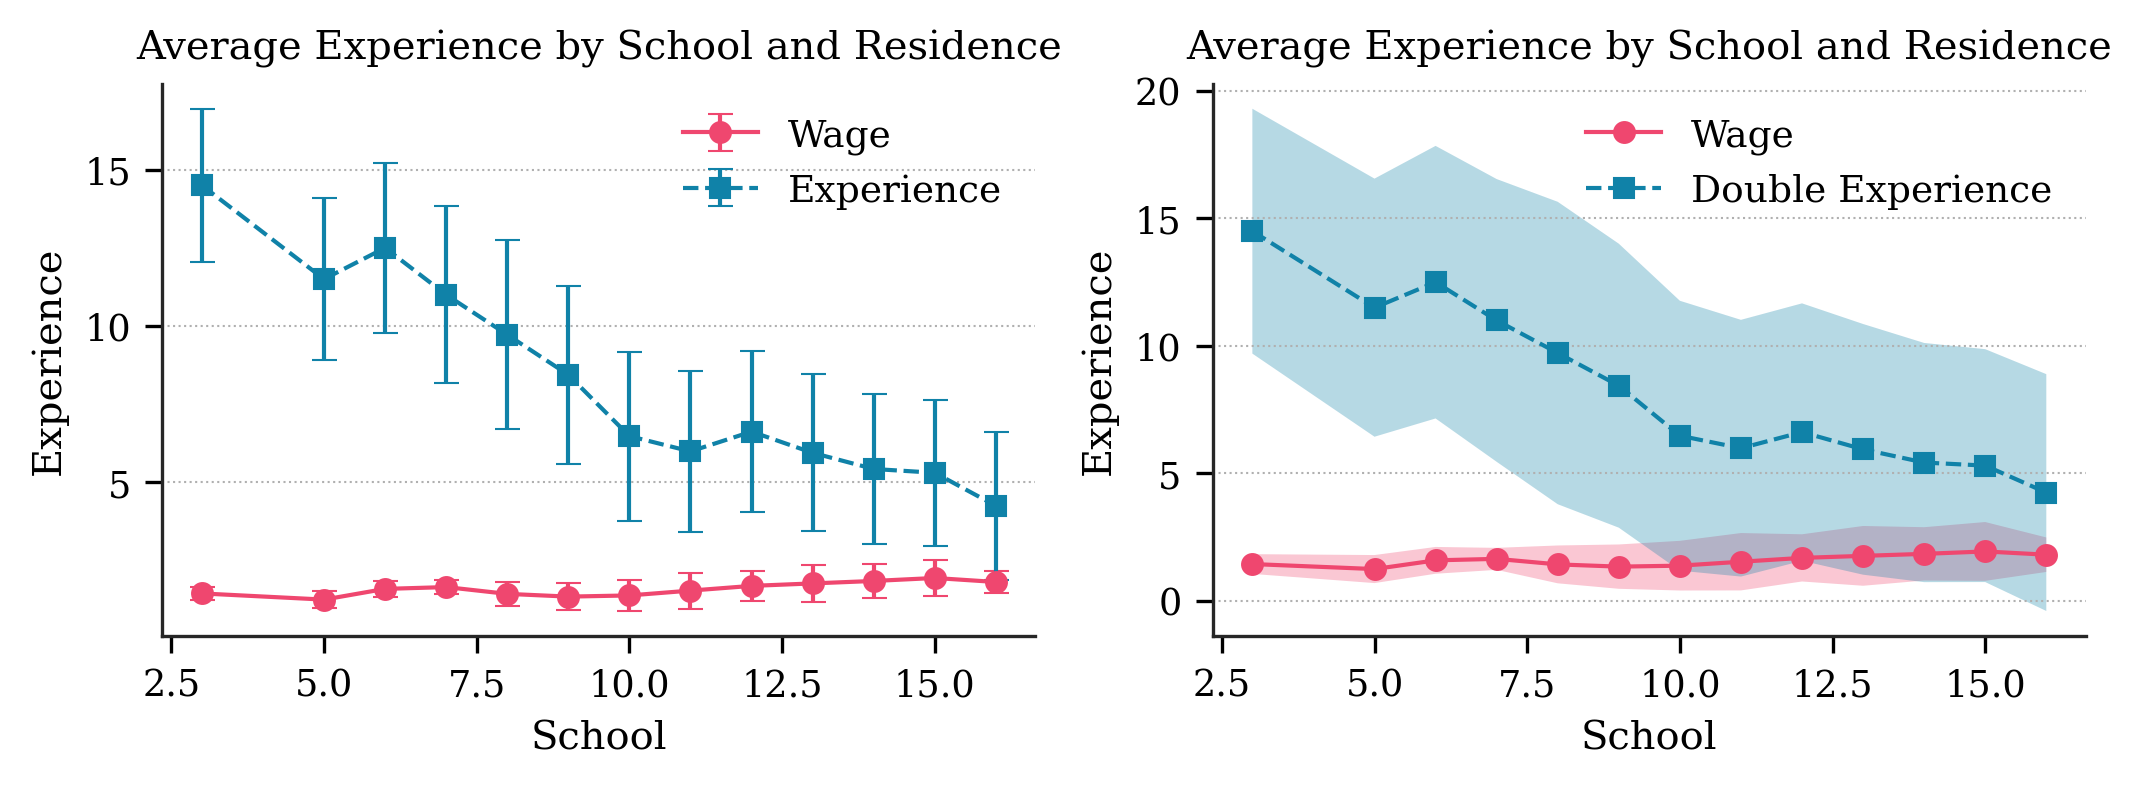

In [28]:
# Set up the FigureManager
fm = FigureManager(
    output_dir=f"{FIGURES_PATH}",
    paper_size=PAPER_SIZE,
    file_ext=FILE_EXT,
    use_latex=USE_LATEX,
)


cd = (
    data.group_by("school")
    .agg(
        pl.mean("wage").alias("wage_mean"),
        pl.std("wage").alias("wage_std"),
        pl.mean("exper").alias("exper_mean"),
        pl.std("exper").alias("exper_std"),
    )
    .with_columns(
        (c.wage_mean - c.wage_std * 1.96).alias("wage_ci_low"),
        (c.wage_mean + c.wage_std * 1.96).alias("wage_ci_high"),
        (c.exper_mean - c.exper_std * 1.96).alias("exper_ci_low"),
        (c.exper_mean + c.exper_std * 1.96).alias("exper_ci_high"),
    )
    .sort("school")
)

# Create figure and subplot managers with specified layout
fig, axes = fm.create_figure(n_rows=1, n_cols=2, n_subplots=2)

axes[0] = generate_plot(
    data=cd,
    x="school",
    y="wage_mean",
    y_err="wage_std",
    ax=axes[0],
    xlabel="School",
    ylabel="Wage",
    title="Average Wage by School and Residence",
    label="Wage",
)
axes[0] = generate_plot(
    data=cd,
    x="school",
    y="exper_mean",
    y_err="exper_std",
    ax=axes[0],
    xlabel="School",
    ylabel="Experience",
    title="Average Experience by School and Residence",
    label="Experience",
)
axes[1] = generate_plot(
    data=cd,
    x="school",
    y="wage_mean",
    y_err=("wage_ci_low", "wage_ci_high"),
    ax=axes[1],
    xlabel="School",
    ylabel="Wage",
    title="Average Wage by School and Residence",
    label="Wage",
)
axes[1] = generate_plot(
    data=cd,
    x="school",
    y="exper_mean",
    y_err=("exper_ci_low", "exper_ci_high"),
    ax=axes[1],
    xlabel="School",
    ylabel="Experience",
    title="Average Experience by School and Residence",
    label="Double Experience",
)

fm.save_figure(filename="std_err_plots")